In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt

## 1 - Importação dos arquivos - Data Aquisition 

https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022?resource=download

In [3]:
# 1.1 - Arquivo Base - Amostra que representa melhor o dataset original

df_base = pd.read_csv("C:/Users/Vitor Hugo Toffoli/Documents/Coderhouse Projeto Ciência de Dados/Base.csv")

# 1.2 - Variação I - Disparidade de Tamanho de Grupo maior que o arquivo base

df_I = pd.read_csv("C:/Users/Vitor Hugo Toffoli/Documents/Coderhouse Projeto Ciência de Dados/Variant I.csv")

# 1.3 - Variação II - Disparidade de Prevalência maior que o arquivo base

df_II = pd.read_csv("C:/Users/Vitor Hugo Toffoli/Documents/Coderhouse Projeto Ciência de Dados/Variant II.csv")

# 1.4 - Variação III - Melhor separabilidade para um dos grupos

df_III = pd.read_csv("C:/Users/Vitor Hugo Toffoli/Documents/Coderhouse Projeto Ciência de Dados/Variant III.csv")

# 1.5 - Variação IV - Disparidade de Prevalência maior em treinamento

df_IV = pd.read_csv("C:/Users/Vitor Hugo Toffoli/Documents/Coderhouse Projeto Ciência de Dados/Variant IV.csv")

# 1.6 - Variação V - Melhor separabilidade em treinamento para um dos grupos

df_V = pd.read_csv("C:/Users/Vitor Hugo Toffoli/Documents/Coderhouse Projeto Ciência de Dados/Variant V.csv")


In [4]:
# Criar uma cópia do primeiro DF
new_df = df_base.copy()

## 2 - Preparação dos Dados - Data Wrangling

In [66]:
pd.options.display.max_columns = None
df_base.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,NaN,25.0,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9.0,0,1500.0,0,INTERNET,16.224843,linux,1,1.0,0,0
1,0,0.8,0.617426,NaN,89.0,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2.0,0,1500.0,0,INTERNET,3.363854,other,1,1.0,0,0
2,0,0.8,0.996707,9.0,14.0,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30.0,0,200.0,0,INTERNET,22.730559,windows,0,1.0,0,0
3,0,0.6,0.475100,11.0,14.0,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1.0,0,200.0,0,INTERNET,15.215816,linux,1,1.0,0,0
4,0,0.9,0.842307,NaN,29.0,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26.0,0,200.0,0,INTERNET,3.743048,other,0,1.0,0,0


## 3 - Exploratory Data Analisys (EDA)

A análise exploratória de Dados será efetuada com Data Frame Base por representar melhor o dataset original

In [67]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         287080 non-null   float64
 4   current_address_months_count      995746 non-null   float64
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [68]:
# Quantidade/Número de valores únicos em cada coluna
df_base.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              373
current_address_months_count           422
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       32
has_other_cards                          2
proposed_cr

In [69]:
#Sumário de informações estatísticas para cada coluna numérica do dataframe base
df_base.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,287080.0,60.719967,63.578187,5.000000e+00,25.000000,34.000000,72.000000,383.000000
current_address_months_count,995746.0,86.962058,88.409289,0.000000e+00,20.000000,53.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [70]:
#Sumário de informações estatísticas para cada coluna não-numérica do dataframe base
df_base.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


Esta análise já demonstra algumas informações:
 - Na coluna source (origem das aplicações), a grande maioria das aplicações são realizadas através de navegador browser (INTERNET) ao invés de Aplicativos (APP)
 - Variáveis com dados únicos a serem tratados por encoder visando classificação por modelos de IA eventualmente treinados

In [71]:
#Quantidade de transações identificadas como fraude (valor 1)
qtd_fraudes = pd.DataFrame(df_base['fraud_bool'].value_counts())

print(qtd_fraudes)

             count
fraud_bool        
0           988971
1            11029


In [72]:
qtd_fraudes.reset_index(inplace= True)
qtd_fraudes.rename(columns={'index' :'fraud_bool', 'fraud_bool': 'identificação_fraude' })

,identificação_fraude,count
0,0,988971
1,1,11029


In [73]:
paleta_cores = sns.color_palette("husl", 6)
sns.set_style("whitegrid")

C:\Users\Vitor Hugo Toffoli\AppData\Local\Temp\ipykernel_1508\3435892701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=qtd_fraudes, x= "fraud_bool", y = 'count', palette= paleta_cores)
C:\Users\Vitor Hugo Toffoli\AppData\Local\Temp\ipykernel_1508\3435892701.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=qtd_fraudes, x= "fraud_bool", y = 'count', palette= paleta_cores)


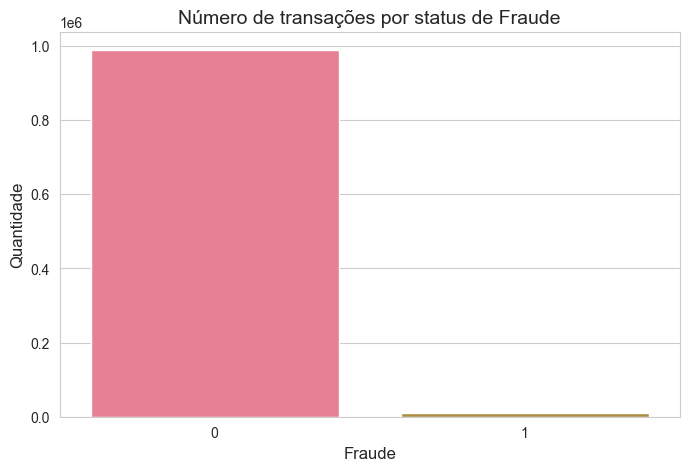

In [74]:
plt.figure(figsize=(8,5))
sns.barplot(data=qtd_fraudes, x= "fraud_bool", y = 'count', palette= paleta_cores)

plt.xlabel("Fraude", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Número de transações por status de Fraude", fontsize=14)

plt.show()

In [75]:
#valores faltantes das variáveis por status de fraude
missing_values= pd.DataFrame()

#listar as colunas com valores faltantes (contendo -1)
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

#para cada feature(coluna), trocar o valor de -1 por NaN, calcular a porcentagem de valores faltantes e adicionar ao DF criado de missing_values:

for feature in missing_features:
    df_base.loc[df_base[feature] == -1, feature] = np.nan
    missing_values_col = df_base.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_values[feature] = missing_values_col

    print(missing_values)

            prev_address_months_count
fraud_bool                           
0                               71.06
1                               91.89
            prev_address_months_count  current_address_months_count
fraud_bool                                                         
0                               71.06                          0.43
1                               91.89                          0.13
            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               71.06                          0.43   
1                               91.89                          0.13   

            intended_balcon_amount  
fraud_bool                          
0                              0.0  
1                              0.0  
            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0

In [76]:
missing_values = pd.DataFrame(missing_values.T.stack())

# Resetar o index e renomear as colunas
missing_values.reset_index(inplace=True)
missing_values.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_values)

                         feature  fraud_bool  missing_vals
0      prev_address_months_count           0         71.06
1      prev_address_months_count           1         91.89
2   current_address_months_count           0          0.43
3   current_address_months_count           1          0.13
4         intended_balcon_amount           0          0.00
5         intended_balcon_amount           1          0.00
6              bank_months_count           0         25.23
7              bank_months_count           1         37.54
8      session_length_in_minutes           0          0.20
9      session_length_in_minutes           1          0.16
10     device_distinct_emails_8w           0          0.04
11     device_distinct_emails_8w           1          0.04


C:\Users\Vitor Hugo Toffoli\AppData\Local\Temp\ipykernel_1508\33008446.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.catplot(data=missing_values, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", palette=paleta_cores, alpha=.6, height=4, aspect=2, legend=False)
C:\Users\Vitor Hugo Toffoli\AppData\Local\Temp\ipykernel_1508\33008446.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Fraude", fontsize=10)


<Figure size 800x600 with 0 Axes>

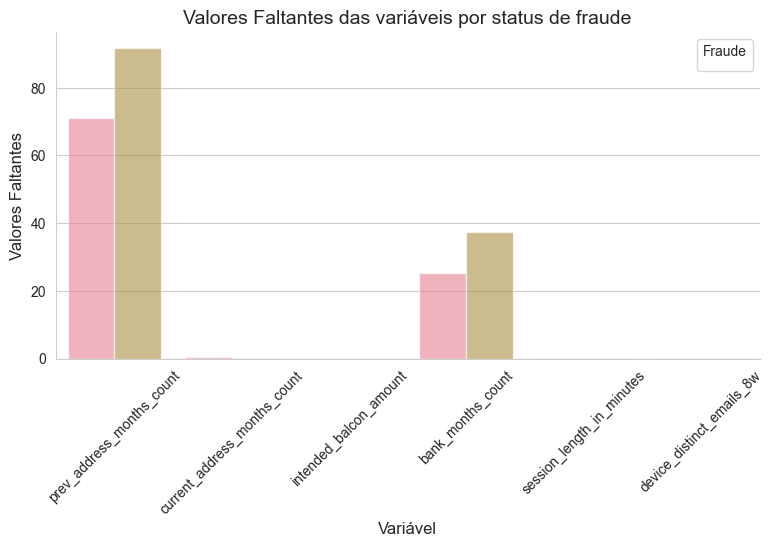

In [77]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.catplot(data=missing_values, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", palette=paleta_cores, alpha=.6, height=4, aspect=2, legend=False)

# Customize labels and legend
plt.xlabel("Variável", fontsize=12)
plt.ylabel("Valores Faltantes", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Valores Faltantes das variáveis por status de fraude", fontsize=14)
plt.legend(title="Fraude", fontsize=10)

# Display plot
plt.show()

In [78]:


# Criar uma lista de variáveis numéricas no DataFrame
numeric_features = [x for x in df_base.columns if df_base[x].nunique() >= 10]

print(numeric_features)



['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


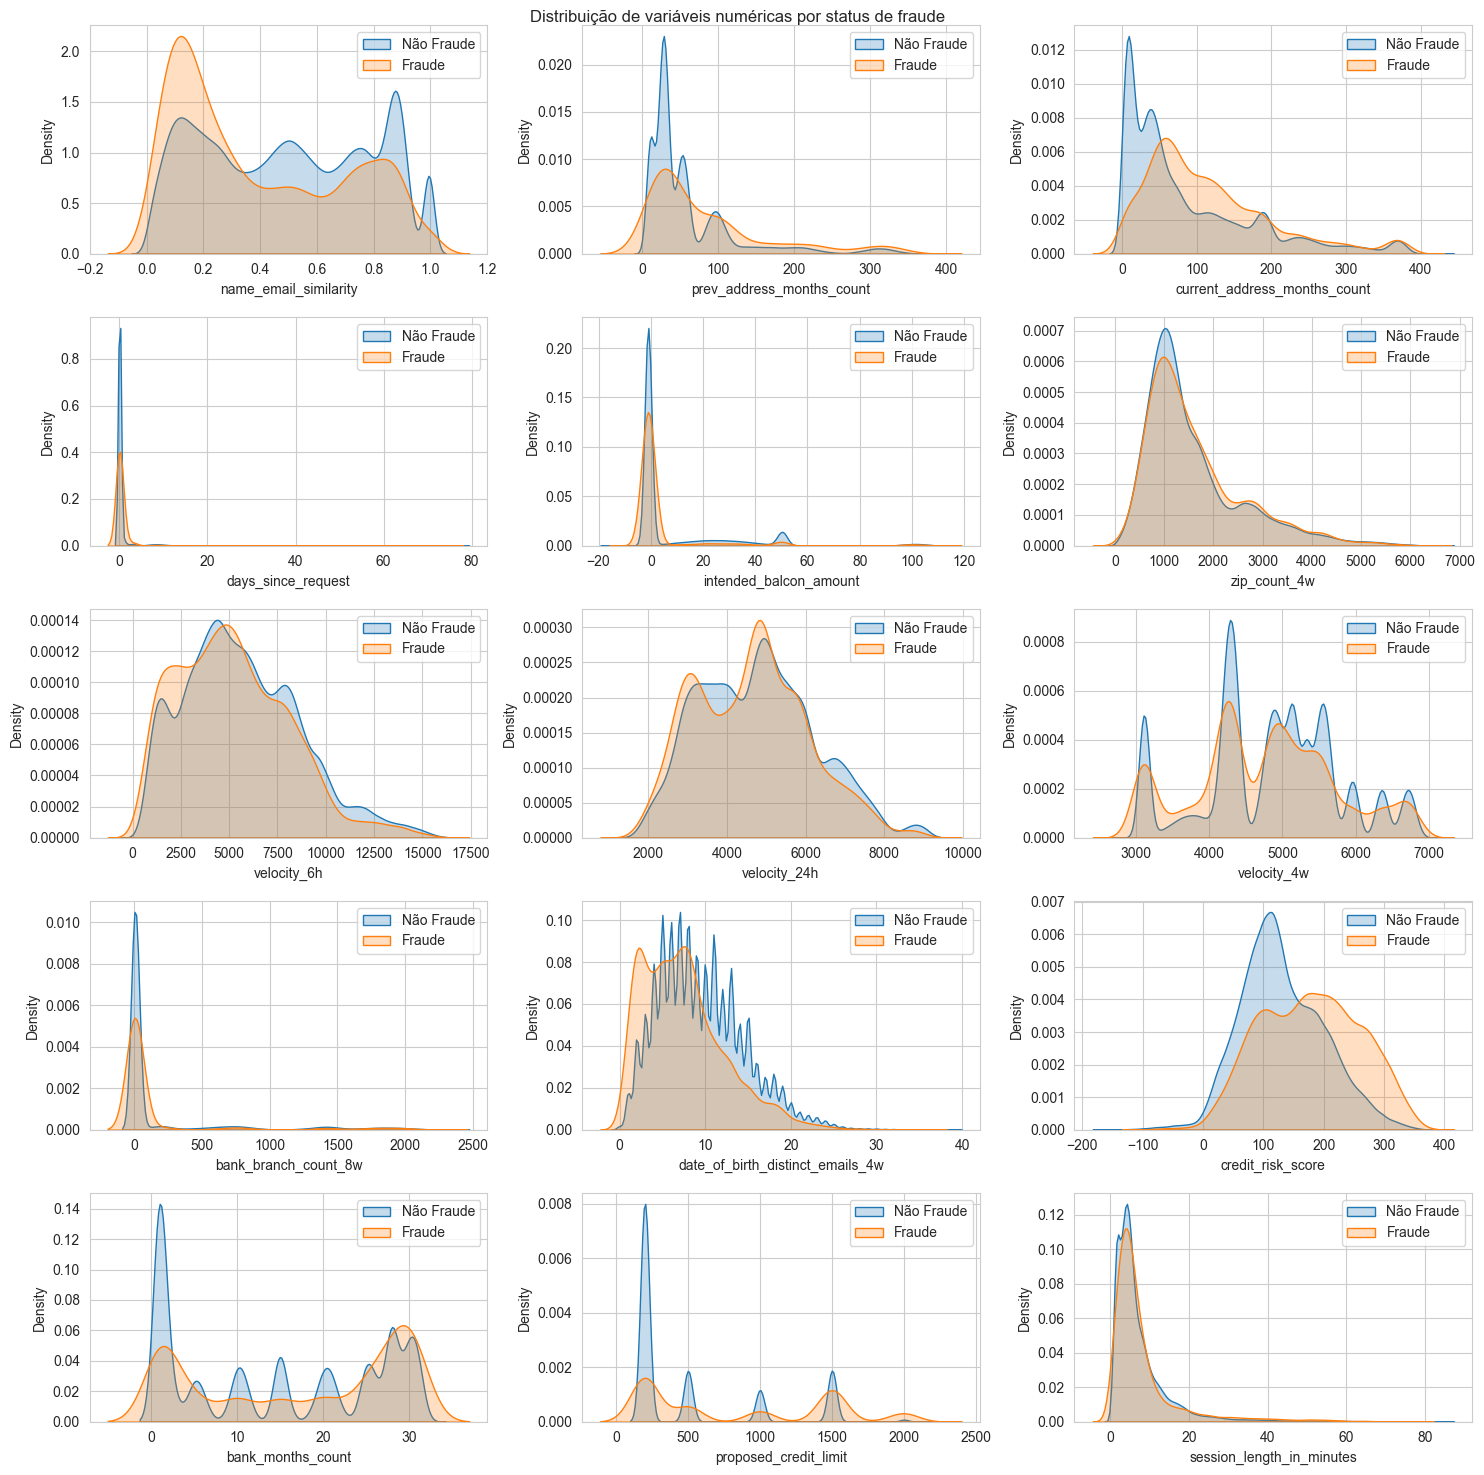

In [79]:
# Criar a grid de subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Título
fig.suptitle('Distribuição de variáveis numéricas por status de fraude')

# Loop para cada variável numérica e kernel plot e fazer plot para cada uma
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df_base[df_base['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Não Fraude')
    sns.kdeplot(data=df_base[df_base['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraude')
    ax.set_xlabel(feature)
    ax.legend()

# Ajustar o layout e mostrar os plots
plt.tight_layout()
plt.show()

Considerações iniciais:
- O gráfico da feature (name_email_similarity) mostra que a maioria das aplicações fraudulentas possuem pouca similaridade entre nome do aplicante e e-mail
- Contas criadas recentemente (bank_months_count) em sua grande parte tendem a não serem classificadas como fraude coforme o pico da "não fraude" logo à frente do zero
- Aplicações fraudulentas propõem limites de crédito baixo (proposed_credit_limit)

## 4 - Manuseio das features 
## 4.1 - One hot encoding para features categóricas

In [84]:
# Criar uma lista das features categóricas no DF cuja o tipo de dado seja 'object'
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

print(categorical_features)

[]


In [85]:
# Converter as variáveis categóricas em variáveis "dummy" com one-hot encoding Converter 
new_df = pd.DataFrame(pd.get_dummies(new_df, prefix=categorical_features))
#https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html


In [86]:
new_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,1,0,1,9,0,1500.0,0,16.224843,1,1,0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,1,1,1,2,0,1500.0,0,3.363854,1,1,0,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,1,0,1,30,0,200.0,0,22.730559,0,1,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,0,1,1,0,200.0,0,15.215816,1,1,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,0,1,1,26,0,200.0,0,3.743048,0,1,0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [87]:
# Separar as features e variável target
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']



## 4.2 - Min Max Scaling para features numéricas

In [88]:
# Importar bibliotecas para processamento dos dados
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler



In [89]:
# dimensionar as features numéricas nos sets de treinamento e teste usando MinMaxScaler
numeric_transformer = MinMaxScaler()

# Definir o ColumnTransformer com o numeric_transformer e a lista das features numéricas
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features)], remainder='passthrough')

# Ajustar o pre-processador no set de treinamento e transformar ambos os sets de treinamento e teste
X_scaled = preprocessor.fit_transform(X)
#X_test_scaled = preprocessor.transform(X_test)

In [90]:
#Pegar os nomes das features depois do pré-processamento
feature_names = preprocessor.get_feature_names_out()

# Remover o 'remainder__' do nome delas
feature_names = [feature.replace('remainder__', '') for feature in feature_names]

# Print do nomes das features pré processadas
print(feature_names)

['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_B

In [91]:
#Converter os sets de treinamento e testes dimensionados para Data Frames
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

X_scaled.head()

,scaled__name_email_similarity,scaled__prev_address_months_count,scaled__current_address_months_count,scaled__days_since_request,scaled__intended_balcon_amount,scaled__zip_count_4w,scaled__velocity_6h,scaled__velocity_24h,scaled__velocity_4w,scaled__bank_branch_count_8w,scaled__date_of_birth_distinct_emails_4w,scaled__credit_risk_score,scaled__bank_months_count,scaled__proposed_credit_limit,scaled__session_length_in_minutes,income,customer_age,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.986507,0.0,0.060606,0.000086,0.918255,0.157934,0.785651,0.798218,0.93939,0.002096,0.128205,0.595707,0.30303,0.685864,0.198216,0.3,40,1,0,1,0,0,1,1,0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
1,0.617426,0.0,0.20979,0.000129,0.11426,0.24735,0.556307,0.541631,0.747399,0.001258,0.461538,0.579606,0.090909,0.685864,0.050217,0.8,20,1,1,1,0,0,1,1,0,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,0.996708,0.026042,0.034965,0.000157,0.109273,0.163308,0.274904,0.508333,0.759605,0.006289,0.282051,0.463327,0.939394,0.005236,0.273082,0.8,40,1,0,1,0,0,0,1,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0.4751,0.03125,0.034965,0.000089,0.106372,0.519779,0.864767,0.664714,0.754276,0.004612,0.333333,0.465116,0.060606,0.005236,0.186605,0.6,30,1,0,1,0,0,1,1,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
4,0.842307,0.0,0.06993,0.073195,0.487853,0.349007,0.460265,0.465935,0.747175,0.000419,0.153846,0.466905,0.818182,0.005236,0.054581,0.9,40,0,1,1,0,0,0,1,0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


O MinMax Scaler aplicado acima tem como objetivo tornar as features numéricas mais comparáveis através da normalização delas dentro de uma range específica. Isso permite outputs mais precisos nos algoritmos

## 5 - Selecionar as Features para Detecção de Fraudes de aplicações de Contas Bancárias

In [92]:
# Importação das bibliotecas de feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier

In [93]:
# Importação das bibliotecas para undersampling  datasets não balanceados
from imblearn.under_sampling import NearMiss
from collections import Counter

In [94]:
%%time

# NearMiss undersampling para lidar com dados imbalanceados
print(f'Test dataset samples per class {Counter(y)}')

# Definir o objeto de NearMiss undersampling  com a estratégia de amostragem de 1 e todas as avaliáveis  cores
nm = NearMiss(sampling_strategy=1, n_jobs=-1)

# Fazer NearMiss undersampling na matriz de  feature X e variável target y
x_scaled_nm, y_scaled_nm = nm.fit_resample(X_scaled, y) #valores nan nesse?

# Print do número de ocorrências para cada classe no dataset 
print('Resampled dataset shape %s' % Counter(y_scaled_nm))

Test dataset samples per class Counter({0: 988971, 1: 11029})
Resampled dataset shape Counter({0: 11029, 1: 11029})
CPU times: total: 1min 19s
Wall time: 15.9 s


In [95]:
#Criar uma lista com as features categóricas no DF X_scaled_nm
categorical_features = [feature for feature in x_scaled_nm.columns if x_scaled_nm[feature].nunique() >= 2 and x_scaled_nm[feature].nunique() < 10]

print(categorical_features)

['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


In [96]:
# Criar lista de features numéricas no DF X_scaled_nm
numeric_features = [feature for feature in x_scaled_nm.columns if x_scaled_nm[feature].nunique() >= 10]

print(numeric_features)



['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes']


## 5.1 - Teste de Limite de Variância para Features Constantes

In [ ]:
# Fazer uma instância de seleção de Limite de Variância e ajustar para o set de treinamento NearMiss-resampled
selector = VarianceThreshold()
selector.fit(x_scaled_nm)
#procura pelas colunas(x) com menor variância

# Pegar os nomes das features constantes
constant_features = [feature for feature in x_scaled_nm.columns 
                     if feature not in x_scaled_nm.columns[selector.get_support()]]

# Print the names of the constant features
print(constant_features)



['device_fraud_count']


In [ ]:
# Fazer o drop das features constantes
x_scaled_nm.drop(['device_fraud_count'], axis=1, inplace=True)




A feature sem variância foi removida do Dataset para melhorar a qualidade. Elas não nos dão informações uteis pois sempre mostram o mesmo valor em todas as instâncias.


## 5.2 - Teste de Correlação de Pearson para Multicolinearidade

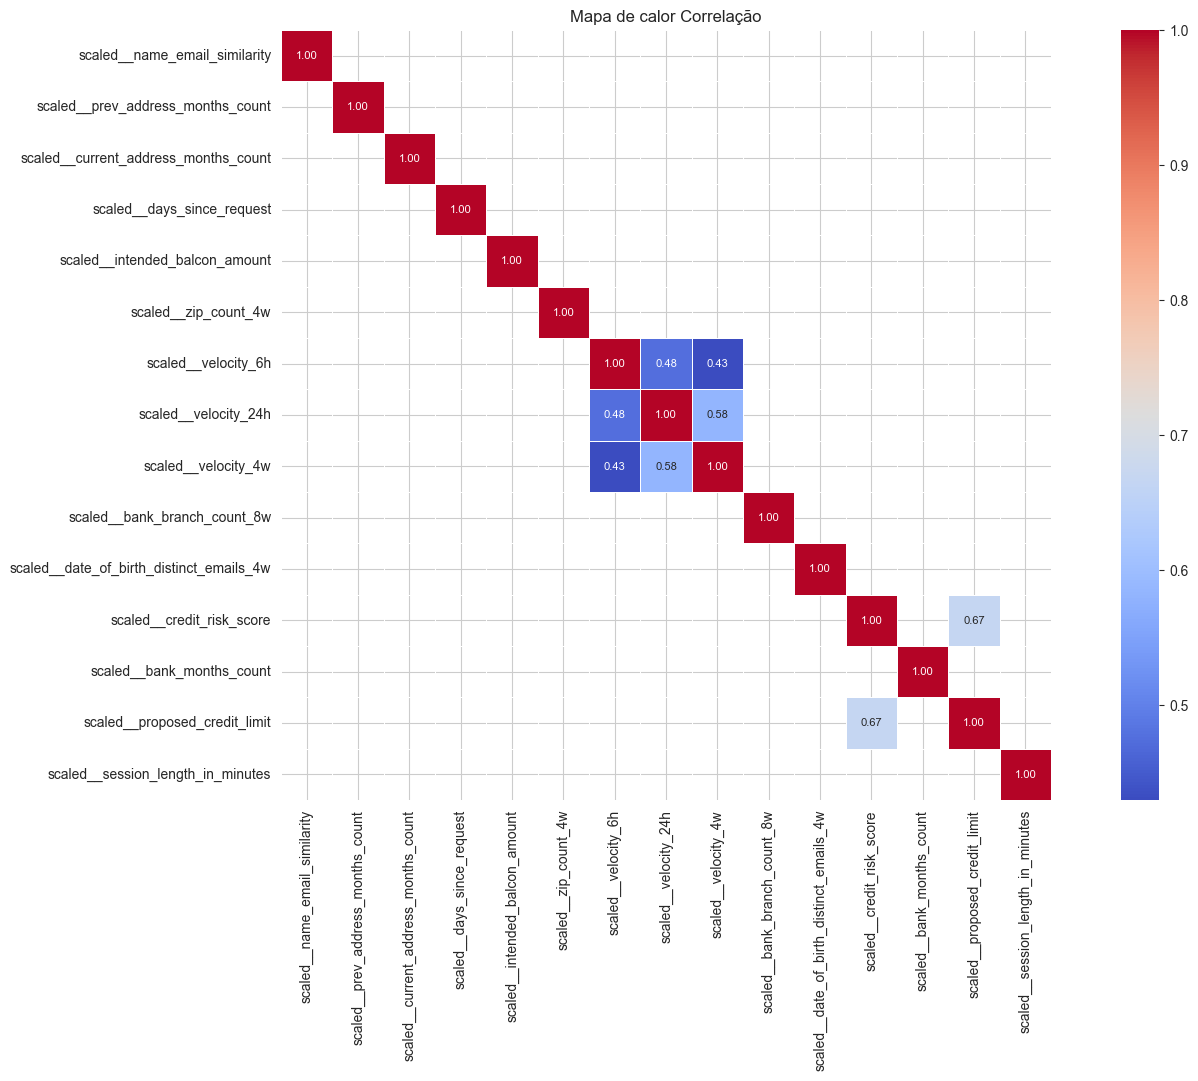

In [97]:

X_train_corr = x_scaled_nm[numeric_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_train_corr[(X_train_corr >= 0.4) | (X_train_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Mapa de calor Correlação')
plt.show()



A correção de Pearson está sendo usada nesta instância como uma ferramenta de medida de relacionamento linear entre as features, o que ajuda a identificar potencial relação entre variáveis. Nenhuma feature mostrou correlação acima de 0.67, indicando ausência de fortes dependências lineares

## 5.3 - Teste Qui Quadrado para Features categóricas

Teste usado para examinar se duas variáveis ​​categóricas são independentes para influenciar a estatística do teste.

In [98]:
#Ver a distribuição de valores numa coluna
x_scaled_nm.device_distinct_emails_8w.value_counts()

device_distinct_emails_8w
 1.0    20865
 2.0     1038
 0.0      151
-1.0        4
Name: count, dtype: int64

In [99]:
# Identificar as linhas para tirar do DF com base numa condição numa feature específica
rows_to_drop = np.where(x_scaled_nm['device_distinct_emails_8w'] < 0)[0]
rows_to_drop

# Tirar as linhas correspondentes no X de treino e X de teste
X_train_cat = x_scaled_nm[categorical_features].copy()
X_train_cat.drop(rows_to_drop, axis=0, inplace=True)

y_train_cat = y_scaled_nm.copy()
y_train_cat.drop(rows_to_drop, axis=0, inplace=True)



In [100]:
#Usar teste quiquadrado para avaliar a relação entre features categórias e a variável targer
chi2_results = chi2(X_train_cat, y_train_cat)
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [101]:
# Novo DF para guardar os ressultas do teste qui-quadrado
chi2_results_df = pd.DataFrame(data={'feature': X_train_cat.columns, 'chi2': chi2_results[0], 'p_value': chi2_results[1]})

C:\Users\Vitor Hugo Toffoli\AppData\Local\Temp\ipykernel_1508\1543025756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=paleta_cores, alpha=.6)
C:\Users\Vitor Hugo Toffoli\AppData\Local\Temp\ipykernel_1508\1543025756.py:5: UserWarning: 
The palette list has fewer values (6) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=paleta_cores, alpha=.6)


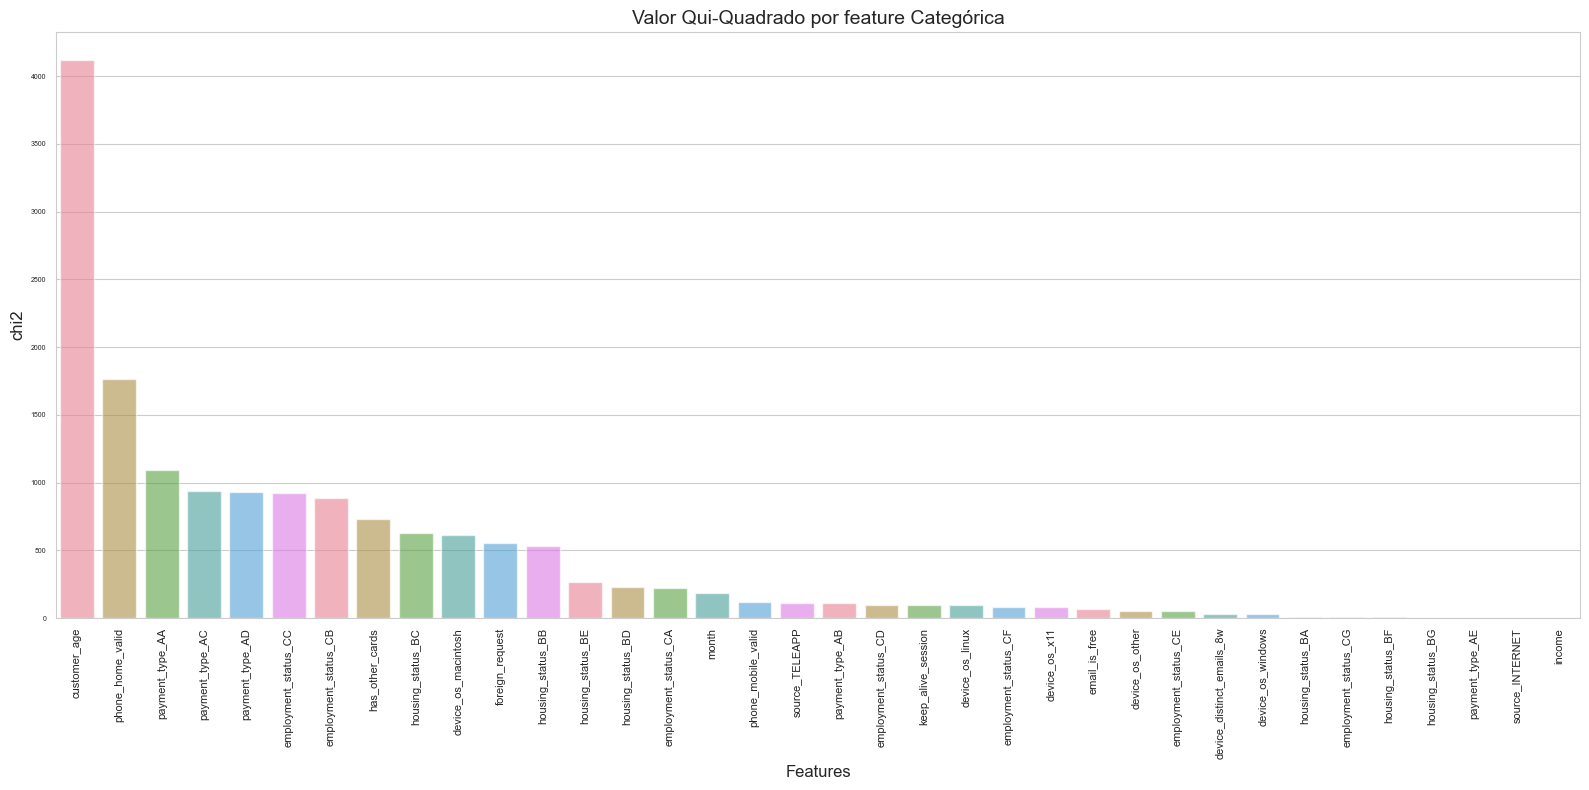

In [102]:


# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=paleta_cores, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Valor Qui-Quadrado por feature Categórica", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


O teste qui quadrado foi feito para averiguar a conexão entre as variáveis categóricas e a variável target. O teste mostra que, dentre todas as features, a idade do cliente é a variável com mais influência na variável target.

In [103]:
# Usar SelectKBest com o teste qui-quadrado para selecionar as 5 features categóricas que tem relação mais forte com a variável target
best_chi2_cols = SelectKBest(chi2, k=15) #k = numéro de features
best_chi2_cols.fit(X_train_cat, y_train_cat)

# Pegar o nome das 5top features
best_chi2_features = [X_train_cat.columns[best_chi2_cols.get_support()]]

# Print
print(best_chi2_features)



[Index(['customer_age', 'phone_home_valid', 'has_other_cards',
       'foreign_request', 'payment_type_AA', 'payment_type_AC',
       'payment_type_AD', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BD', 'housing_status_BE', 'device_os_macintosh'],
      dtype='object')]



## 5.4 - Teste de Informação Mútua para Features numéricas

https://www.youtube.com/watch?v=eJIp_mgVLwE - Métrica que quantifica o quão similar ou diferente duas variáveis são

In [104]:
# Criar novo DF apenas com as features Numéricas
X_train_num = x_scaled_nm[numeric_features].copy()

# Criar cópia
y_train_num = y_scaled_nm.copy()



In [105]:
# Usar teste de informação Mútua para avaliar a relação entre as features numéricas e a variável target
mutual_info_results = mutual_info_classif(X_train_num, y_train_num)
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html


In [106]:
# Novo DF para guardar os resultados do teste de informação mútua 
mutual_info_results_df = pd.DataFrame(data={'feature': X_train_num.columns, 'mutual_info': mutual_info_results})

C:\Users\Vitor Hugo Toffoli\AppData\Local\Temp\ipykernel_1508\1884724821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette= paleta_cores, alpha=.6)
C:\Users\Vitor Hugo Toffoli\AppData\Local\Temp\ipykernel_1508\1884724821.py:5: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette= paleta_cores, alpha=.6)


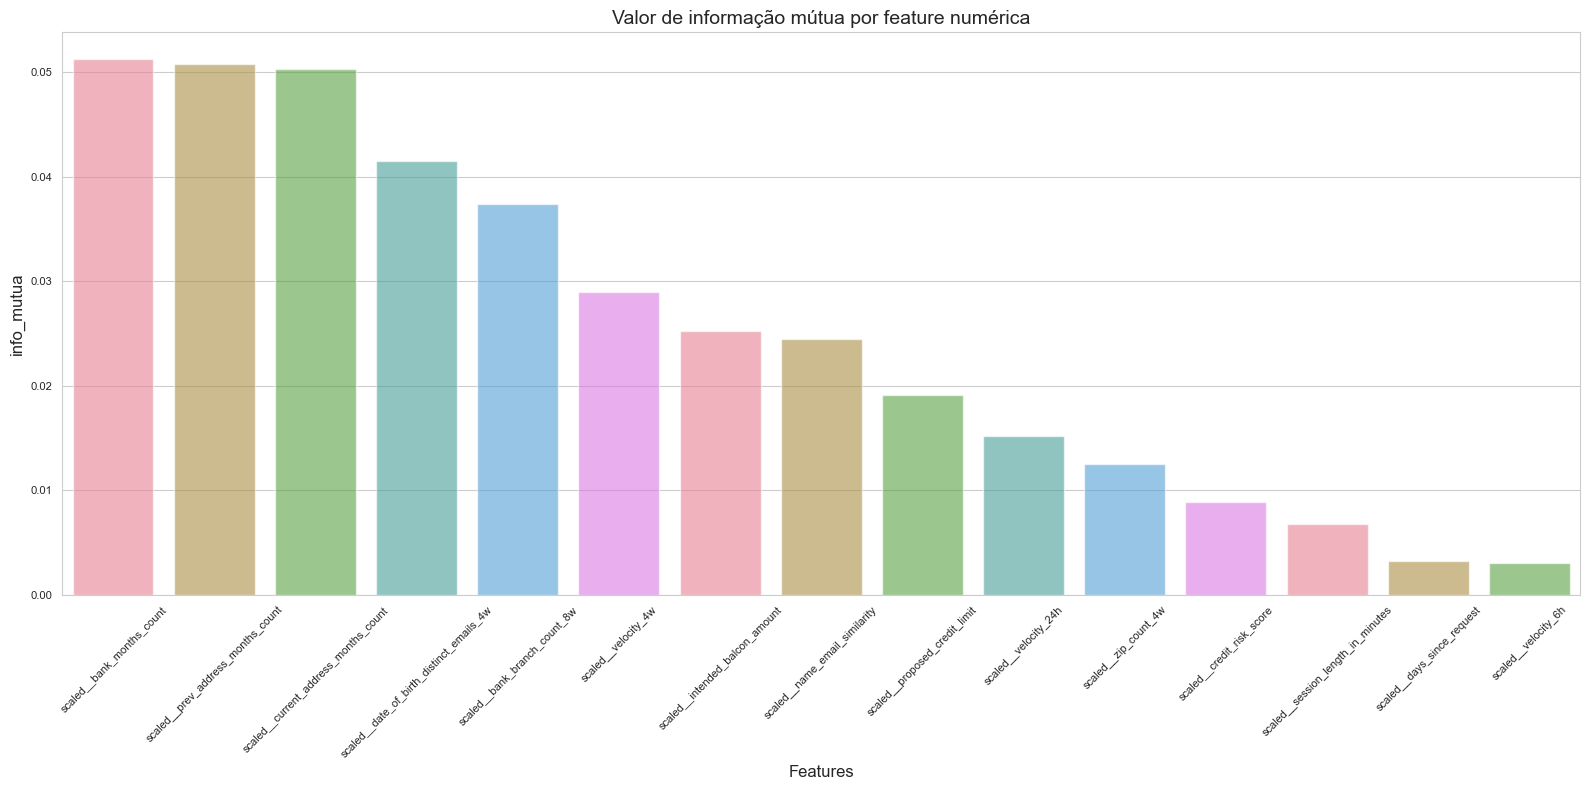

In [107]:
# Ciar o plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette= paleta_cores, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("info_mutua", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Valor de informação mútua por feature numérica", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




Para investigar a conexão entre features numéricas e a variável target, foi realizado teste de informação mútua. Esta Métrica quantifica o quão similar ou diferente duas variáveis são. Entre as variáveis númericas, as seguintes variáveis tiveram a maior influência na predição da variável target:

bank_months_count (o quão velha é a conta bancária anterior)

current_address_months_count (quantidade de meses no endereço atual informado durante o pedido)

prev_address_months_count (quantidade de meses no endereço anteriormente informado durante o pedido)

In [108]:

# SelectKBest com teste de informação mútua para selecionar as 5 features numéricas mais associadas com a variável target
best_mutual_info_cols = SelectKBest(mutual_info_classif, k=15)
best_mutual_info_cols.fit(X_train_num, y_train_num)

# Get the names of the top 5 features
best_mutual_info_features = [X_train_num.columns[best_mutual_info_cols.get_support()]]

# Print the names of the top 5 features
print(best_mutual_info_features)

[Index(['scaled__name_email_similarity', 'scaled__prev_address_months_count',
       'scaled__current_address_months_count', 'scaled__days_since_request',
       'scaled__intended_balcon_amount', 'scaled__zip_count_4w',
       'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w',
       'scaled__bank_branch_count_8w',
       'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score',
       'scaled__bank_months_count', 'scaled__proposed_credit_limit',
       'scaled__session_length_in_minutes'],
      dtype='object')]


## 5.5 - Seleção de features por meio de Extra Trees Classifier


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [109]:

extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(x_scaled_nm, y_scaled_nm)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [x_scaled_nm.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(best_extra_features)



['scaled__name_email_similarity', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AC', 'payment_type_AD', 'employment_status_CA', 'housing_status_BC', 'device_os_windows']


In [110]:
extra_importances = pd.DataFrame({'feature': x_scaled_nm.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

C:\Users\Vitor Hugo Toffoli\AppData\Local\Temp\ipykernel_1508\3186504749.py:5: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=paleta_cores, alpha=.6)


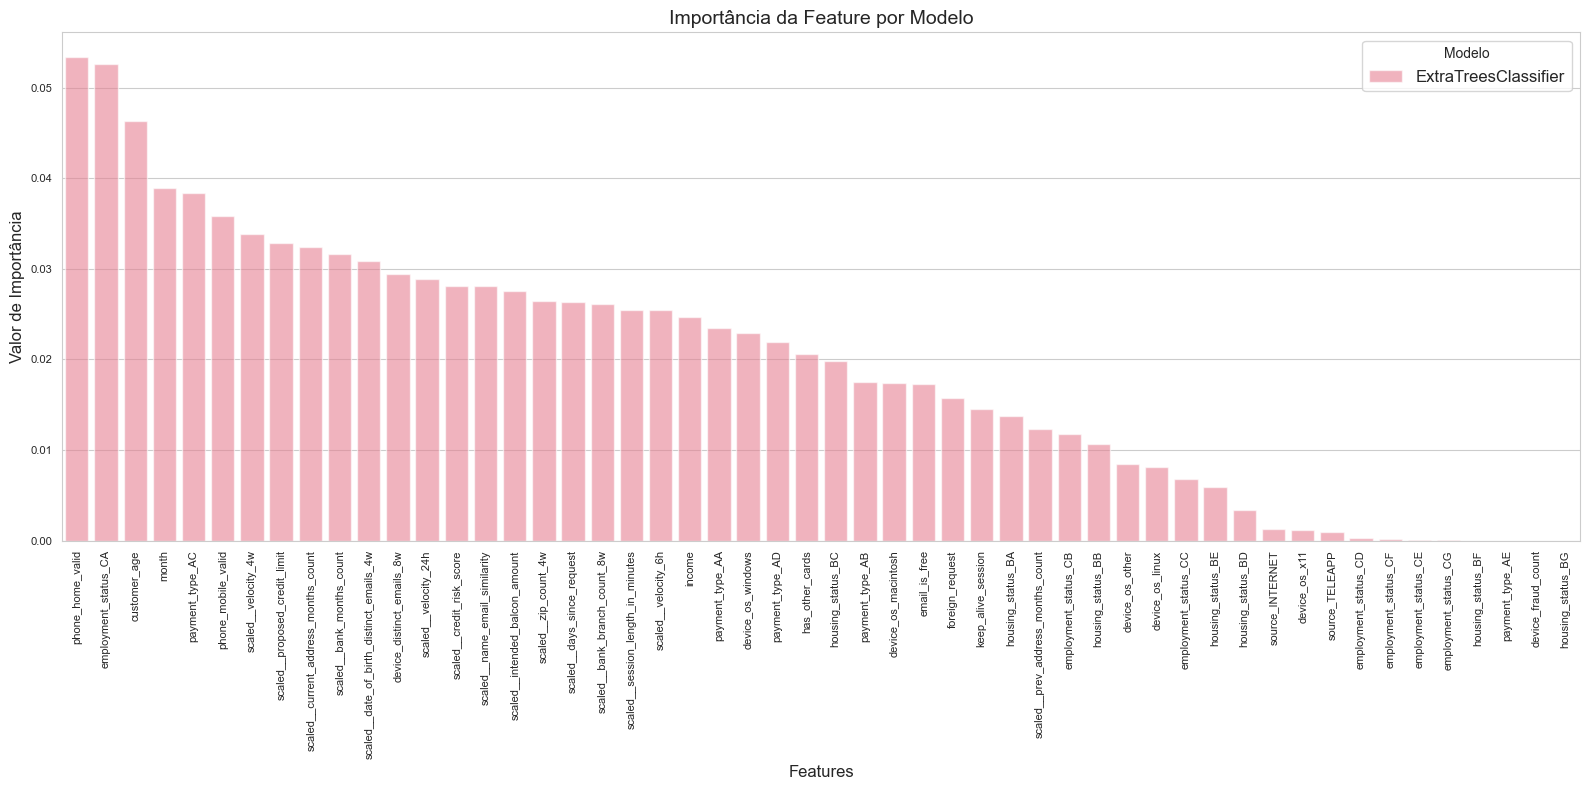

In [111]:
# Plot
plt.figure(figsize=(16, 8))

# Plot agrupado por barras
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=paleta_cores, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Valor de Importância", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Importância da Feature por Modelo", fontsize=14)
plt.legend(title='Modelo', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



A decisão de usar ExtraTreesClassifier para seleção de feature mostrou-se compatível com o dataset. Em contraste aos testes de qui-quadrado e de informação mútua, o ExtraTreesClassifier deu resultados diferentes. Após avaliação, foram identificadas as seguintes variáveis com preditores influentes para a variável target:

 employment_status_CA (status de empregabilidade do cliente)
 
 phone_home_valid (número residencial válido)
 
 customer_age (idade do cliente)
 
 payment_type_AC (tipo de pagamento)
 
 phone_mobile_valid (número de telefone móvel válido)

## 6 - Treinamento de Modelo de Detecção de Fraude com SMOTE e Grid Search CV

In [112]:
# Importar as bibliotecas para amostragem dos datasets imbalanceados
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [113]:

def train_classifier(classifier, param_dist, X_train, y_train, encoded_features, search_type='random'):
    """
    Treinar um classificador usando os parâmetros especificados e returnar o modelo treinado

    Parâmetros:
    classifier (sklearn estimator): O estimador pra treinar
    param_dist (dict): A distribuição de parâmetros para pesquisar
    X_train (pandas DataFrame): As Features de Treinamento
    y_train (pandas Series): A target de treinamento
    encoded_features (lista): A lista de features categóricas com encoding (ponto 4.1)
    search_type (str, Opcional):O tipo de busca paramétrica para fazer.
    
    Return:
    Classificador Treinado.
    """
    
    # Aplicar SMOTENC para lidar com classes imbalanceadas
    smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)
        
    # Criar um pipeline com SMOTENC e o classificador
    pipeline = make_pipeline(smote_nc, classifier)
    #https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
    
    # Definir estratégica de validação cruzada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Fazer a busca paramétrica
    if search_type == 'random':
        search_cv = RandomizedSearchCV(estimator=pipeline, 
                                      param_distributions=param_dist,
                                      n_iter=20,
                                      scoring="roc_auc",
                                      n_jobs=-1,
                                      cv=cv)
    elif search_type == 'grid':
        search_cv = GridSearchCV(estimator=pipeline,
                                 param_grid=param_dist,
                                 scoring="roc_auc",
                                 n_jobs=-1,
                                 cv=cv)
    else:
        raise ValueError('search_type deve ser "random" ou "grid"')
        
    # Ajustar o modelo e retornar o classificador treinado
    search_cv.fit(X_train, y_train)

    return search_cv



## 7 - Treinamento de Modelo de Detecção de Fraude com Recall e ROC-AUC

Acurácia por si só pode não ser confiável para avaliar fraudes bancárias nos demais datasets imbalanceados

Recall - A taxa de verdadeiro positivo ou a proporção de todos os positivos reais que foram classificados corretamente como positivos

ROC - Característica de Operação do Receptor - Representação gráfica que ilustra o desempenho (ou performance) de um sistema classificador binário à medida que o seu limiar de discriminação varia

AUC- A área sob a curva ROC (AUC) - probabilidade de que o modelo, se receber um exemplo positivo e negativo aleatoriamente, classificará positivo maior que negativo

In [114]:
%%time

#Importação das bibliotecas para métricas e avaliação

from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

CPU times: total: 0 ns
Wall time: 0 ns


## 7.1 - Relatório de Classificação para Teste de Modelo

In [118]:
def print_cls_report(y_test, y_pred, title):
    # Calcular o relatório de classificação
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])
    
    # Calcular precisão, recall, e F1 score para cada classe
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print do título e classificação padrão
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return dos scores de recall para cada classe
    return recall

## 7.2 - Matrix de Confusão para teste de modelo

In [120]:
def plot_con_matrix(ax, y_test, y_pred, title):
    # Definir as classes da classificação
    classes = ['No Fraud', 'Fraud']

    # Computar a matrix de confusão
    con_matrix = confusion_matrix(y_test, y_pred)

    #Computar os valores para negativos verdadeiros, falsos positivos, falsos negativos e verdadeiros positivos
    tn, fp, fn, tp = con_matrix.ravel()

    #Contar a taxa de Falso positivo
    fpr = fp / (fp + tn)

    #Plot da Matrix de confusão com mapa de calor
    ax.imshow(con_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Definir as marcas e labels
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    # Adicionar a contagem para cada célula da matriz de confusão para o plot
    fmt = 'd'
    threshold = con_matrix.max() / 2.
    for i, j in np.ndindex(con_matrix.shape):
        ax.text(j, i, format(con_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if con_matrix[i, j] > threshold else "black")

    # Adicionar labels para o plot
    ax.set_xlabel('Label Prevista')
    ax.set_ylabel('Label Verdadeira')
    ax.set_title(f'{title} com {fpr*100:.2f}% FPR')

## 7.3 Resultados da validação cruzada para teste do modelo

In [121]:
def print_cv_results(model):
    # Pegar o parâmetro e escore do cv_results (ponto 6)
    means = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']

    #Combinar os arrays com zip()
    combined_results = zip(means, params)

    #Organizar o array combinado por média do teste de score
    sorted_results = sorted(combined_results, key=lambda x: x[0], reverse=True)

    # Print 
    for mean, param in sorted_results:
        print("mean_test_score: %f, params: %r" % (mean, param))

## 7.4 - Modelo de Teste com ROC-AUC

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [122]:
def plot_roc_curves(fpr_list, tpr_list, label_list):
    plt.figure(figsize=(8, 8))
    for i in range(len(fpr_list)):
        # Computar o score do ROC AUC
        roc_auc_score = auc(fpr_list[i], tpr_list[i])
        # Plot da curva ROC
        plt.plot(fpr_list[i], tpr_list[i], label=f'{label_list[i]} (AUC={roc_auc_score:.2f})')
    
    #Plot da curva do random classifier
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # Set the plot labels and title
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('axa de Verdadeiro Positivo')
    plt.title('Curva Característica de Operação do Receptor (ROC)')
    plt.legend()
    plt.show()

In [123]:
def test_classifier(classifier, X_test, y_test):
    """
    Avalia o classificador Binário gerando curvas ROC
    
    Parâmetros:
    -----------
    classifier : classifier object
       Objeto a ser avaliado.
    X_test : numpy.ndarray ou pandas.DataFrame
        Test feature data.
    y_test : numpy.ndarray ou pandas.Series
        Test target labels.
        
    Returns:
    --------
    tuple :Tuple contendo quatro valores: Taxa de Falso Positivo(FPR), Taxa de Verdadeiro Positivo(TPR), Default Recall e Target Recall
      
    """
    
    # Prever as probabilidades das classes e labels usando o Classificador Treinado
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calcular a taxa de falso positivo e de verdadeiro positivo para limites diferentes
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Escolher o limiar da taxa de falso positivo com base na curva ROC
    target_fpr = 0.05
    threshold_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[threshold_idx]
    
    # Fazer predições no set de teste usando o limiar
    y_pred_threshold = (y_prob >= threshold).astype(int)
    
    # Print do relatório de classificação para default e target threshold
    default_recall = print_cls_report(y_test, y_pred, title="Default Threshold")
    target_recall = print_cls_report(y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Plot matriz de confusão
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    default_matrix = plot_con_matrix(ax1, y_test, y_pred, title='Default Threshold @ 0.50')
    target_matrix = plot_con_matrix(ax2, y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Ajustar subplots 
    plt.tight_layout()
    
    # Display
    plt.show()

    return fpr, tpr, default_recall, target_recall


## 8 - Algoritmos de ML baseados em Trees para Detecção de Fraude em Aplicações de contas bancárias

 XGBoost e LightGBM para lidar com datasets imabalanceados e classificar dados tabulados

In [124]:
# Importação dos Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



## 8.1 - Reamostragem para treinamento de modelo eficaz

In [125]:
# Separar a matrix de features e a variável target
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

In [126]:
# Tirar as features constantes do teste de limiar variância
X.drop(['device_fraud_count'], axis=1, inplace=True)

# Selecionando features do ExtraTreesClassifier 
# selected_features = [feature.replace('scaled__', '') for feature in best_extra_features]
# X = X[selected_features]

In [127]:
%%time

# Fazer subamostragem de NearMiss para lidar com dados imbalanceados
print(f'Sample de dataset teste por classe {Counter(y)}')

#Definir o objeto de NearMiss com estratégia de amostragem de 0.1
nm = NearMiss(sampling_strategy=0.1, n_jobs=-1)

# Fazer subamostragem do NearMiss nas features da Matrix X e variável target
X_nm, y_nm = nm.fit_resample(X, y)

# Print do número de ocorrência para cada classe no dataset
print('Resampled dataset shape %s' % Counter(y_nm))

Sample de dataset teste por classe Counter({0: 988971, 1: 11029})
Resampled dataset shape Counter({0: 110290, 1: 11029})
CPU times: total: 1min 15s
Wall time: 14.3 s


In [128]:
# Importar a biblioteca para separar os dados entre treino e teste
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [129]:
# Separar a amostragem dos dados em sets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.25, random_state=42, stratify=y_nm)

In [130]:
# Pegar os índices das features encodadas pro set de treinamento
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]



## 8.2 - Algoritmo de Tree 1 - Decision Tree

In [131]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Definir Dicionário com parâmetros para árvore de decisão
dt_params = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
             'decisiontreeclassifier__max_depth': [2, 4, 6, 8, 10],
             'decisiontreeclassifier__max_features': ['sqrt', 'log2']
            }



In [132]:
%%time

# # Train a DecisionTree classifier using 'train_classifier' function and the given parameters
dt_model = train_classifier(dt, dt_params, X_train, y_train, encoded_features)



CPU times: total: 51.7 s
Wall time: 11min 14s


In [133]:
print_cv_results(dt_model)

mean_test_score: 0.839727, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.838258, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'gini'}
mean_test_score: 0.837386, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.830533, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'gini'}
mean_test_score: 0.829074, params: {'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'gini'}
mean_test_score: 0.828231, params: {'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifie

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.89      0.92     27573
       Fraud       0.37      0.64      0.47      2757

    accuracy                           0.87     30330
   macro avg       0.66      0.77      0.70     30330
weighted avg       0.91      0.87      0.88     30330

Target Threshold @ 0.79
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.95      0.95      0.95     27573
       Fraud       0.48      0.46      0.47      2757

    accuracy                           0.91     30330
   macro avg       0.71      0.71      0.71     30330
weighted avg       0.90      0.91      0.90     30330



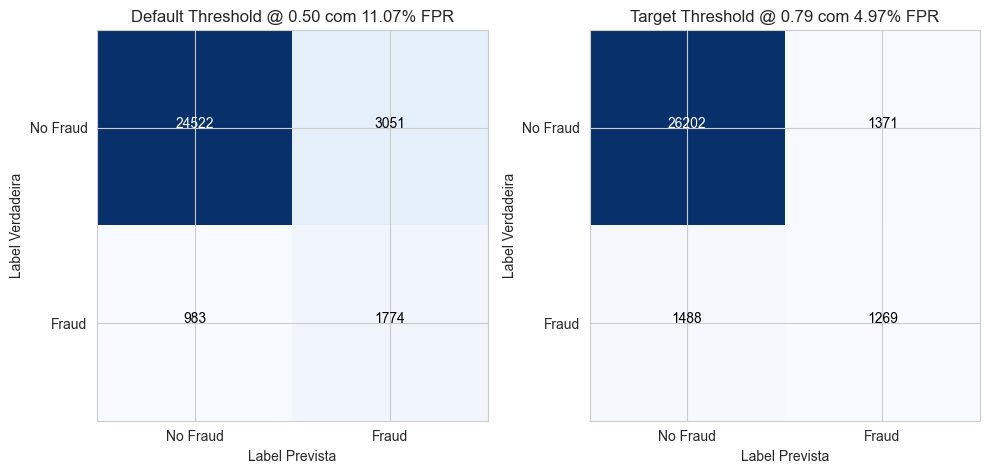

In [134]:
# Testando o modelo de árvore de decisão com os dados de teste e calculando métricas
dt_fpr, dt_tpr, dt_default_recall, dt_target_recall = test_classifier(dt_model, X_test, y_test)

# 8.2.1 - Resultados

Usando Limite de Classificação de 0.79:

    Verdadeiros Positivos (TP): O modelo de Árvore de Decisão previu com sucesso 1269 casos positivos de fraude

    Falsos Positivos (FP): Houveram 1371 que o modelo classificou incorretamente como Fraude

    Verdadeiros Negativos (TN): O modelo classificou corretamente 26202 instâncias negativas (não fraude) como verdadeiros Negativos

    Falsos Negativos (FN): Houveram 1488 instâncias em que ele falhou em detectar um Verdadeiro Positivo (TP)



# 8.3 - Algoritmo de Tree 2 - RandomForest

In [ ]:
# Modelo de RandomForestClassifier 
rf = RandomForestClassifier()

# Definir um dicionário com os parâmetros para o RandomForestClassifier
rf_params = {'randomforestclassifier__n_estimators': [20, 40, 60, 80, 100],
            'randomforestclassifier__criterion': ['gini', 'entropy'],
            'randomforestclassifier__max_depth': [2, 4, 6, 8, 10],
            'randomforestclassifier__max_features': ['sqrt', 'log2']
            }



In [ ]:
%%time

#Treinar um  RandomForestClassifier usando a função train_classifier e os parâmetros passados no dicionário acima
rf_model = train_classifier(rf, rf_params, X_train, y_train, encoded_features)

CPU times: total: 1min 17s
Wall time: 13min 52s


In [ ]:
print_cv_results(rf_model)

mean_test_score: 0.921565, params: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.921365, params: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.920810, params: {'randomforestclassifier__n_estimators': 40, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.918596, params: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.916189, params: {'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_features': 'log2', 'randomfore

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.94      0.95     27573
       Fraud       0.53      0.69      0.60      2757

    accuracy                           0.92     30330
   macro avg       0.75      0.81      0.78     30330
weighted avg       0.93      0.92      0.92     30330

Target Threshold @ 0.53
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.95      0.96     27573
       Fraud       0.56      0.64      0.60      2757

    accuracy                           0.92     30330
   macro avg       0.76      0.80      0.78     30330
weighted avg       0.93      0.92      0.92     30330



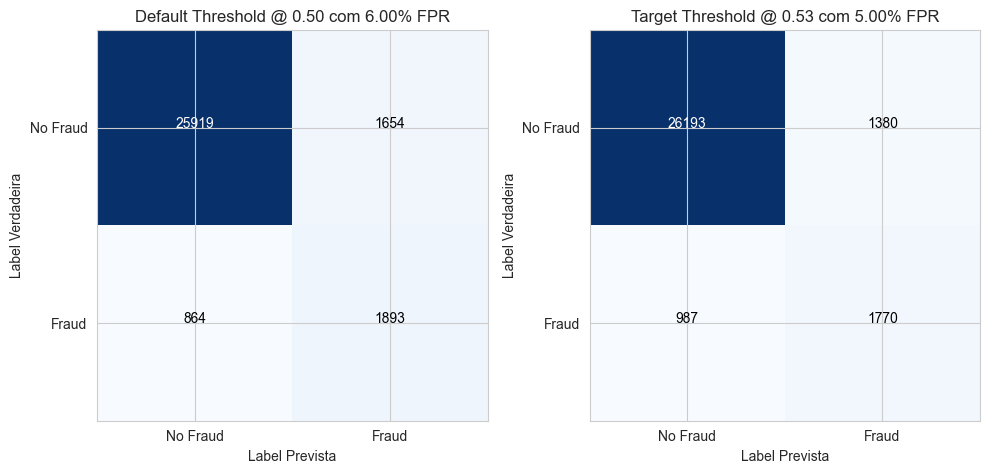

In [ ]:
# Testando o modelo de RandomForest com dados de teste e calculando métricas
rf_fpr, rf_tpr, rf_default_recall, rf_target_recall = test_classifier(rf_model, X_test, y_test)



## 8.3.1 - Resultados
Usando limite de classificação de 0.53:


    Verdadeiros Positivos (TP): O modelo RandomForest detectou com sucesso 1770 fraudes verdadeiras

    Falsos Positivos (FP): Houveram 1380 que o modelo classificou incorretamente como Fraude

    Verdadeiros Negativos (TN): O modelo classificou corretamente 26193 instâncias negativas (não fraude) como verdadeiros Negativos

    Falsos Negativos (FN): Houveram 987 instâncias em que ele falhou em detectar um Verdadeiro Positivo (TP)



## 8.4 - Algoritmo de Tree 3 -  XGBoost

https://xgboost.readthedocs.io/en/stable/python/sklearn_estimator.html

In [ ]:


# Fazer um modelo de XGBClassifier com aceleração de GPU para treinamento
xgb = XGBClassifier(tree_method='hist')

# Definir um dicionário com os parâmetros para o XGBClassifier 
xgb_params = {'xgbclassifier__n_estimators': [20, 40, 60, 80, 100],
              'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
              'xgbclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
              'xgbclassifier__min_child_weight': [1, 2, 3, 4],
              'xgbclassifier__subsample': [0.6, 0.8, 1.0],
              'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]
}

In [ ]:
%%time

# # Treinar XGBoost classifier usando a função 'train_classifier' e os parâmetros acima
xgb_model = train_classifier(xgb, xgb_params, X_train, y_train, encoded_features)

CPU times: total: 1min 5s
Wall time: 12min 8s


In [ ]:
print_cv_results(xgb_model)

mean_test_score: 0.950089, params: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 3, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 1.0}
mean_test_score: 0.949318, params: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__min_child_weight': 2, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 0.8}
mean_test_score: 0.948381, params: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 1.0}
mean_test_score: 0.944440, params: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 60, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.97      0.97     27573
       Fraud       0.73      0.67      0.70      2757

    accuracy                           0.95     30330
   macro avg       0.85      0.82      0.84     30330
weighted avg       0.95      0.95      0.95     30330

Target Threshold @ 0.28
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.98      0.95      0.96     27573
       Fraud       0.60      0.77      0.67      2757

    accuracy                           0.93     30330
   macro avg       0.79      0.86      0.82     30330
weighted avg       0.94      0.93      0.94     30330



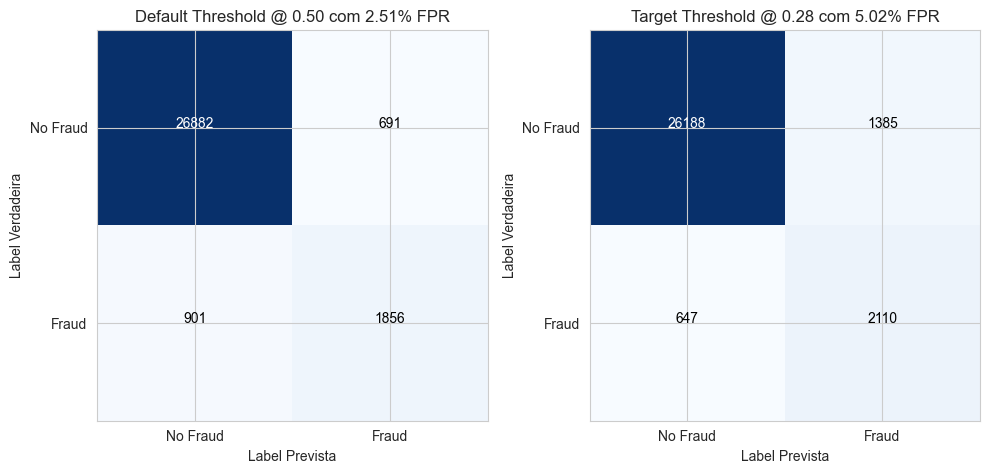

In [ ]:
# Testando o modelo de XGBoost usando os dados de teste e calculando as métricas
xgb_fpr, xgb_tpr, xgb_default_recall, xgb_target_recall = test_classifier(xgb_model, X_test, y_test)



## 8.4.1 - Resultados 

Usando limite de classificação de 0.28:


    Verdadeiros Positivos (TP): O modelo RandomForest detectou com sucesso 2110 casos de Fraude

    Falsos Positivos (FP): Houveram 1385 que o modelo classificou incorretamente como Fraude

    Verdadeiros Negativos (TN): O modelo classificou corretamente 26188 instâncias negativas (não fraude) como verdadeiros Negativos

    Falsos Negativos (FN): Houveram 647 instâncias em que ele falhou em detectar um Verdadeiro Positivo (TP)



## 8.5 - Algoritmo de Tree 4 -  LightGBM

In [ ]:
# Criar um modelo de LGBMClassifier GPU acceleration for training
lgb = LGBMClassifier(device='gpu')

# Definir dicionário com parâmetros pro LGBMClassifier
lgb_params = {'lgbmclassifier__max_depth': [2, 4, 6, 8, 10],
               'lgbmclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
               'lgbmclassifier__n_estimators': [20, 40, 60, 80, 100],
               'lgbmclassifier__min_child_weight': [1, 2, 3, 4],
               'lgbmclassifier__subsample': [0.6, 0.8, 1.0],
               'lgbmclassifier__colsample_bytree': [0.6, 0.8, 1.0]
}

In [ ]:
%%time

# # Treinar LightGBM classifier
lgb_model = train_classifier(lgb, lgb_params, X_train, y_train, encoded_features)



[LightGBM] [Info] Number of positive: 82717, number of negative: 82717
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3478
[LightGBM] [Info] Number of data points in the train set: 165434, number of used features: 49
[LightGBM] [Info] Using GPU Device: GeForce GT 610, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 22 dense feature groups (3,79 MB) transferred to GPU in 0,010779 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000
CPU times: total: 1min 12s
Wall time: 2h 30min 51s


In [ ]:
print_cv_results(lgb_model)

mean_test_score: 0.949871, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__n_estimators': 80, 'lgbmclassifier__min_child_weight': 4, 'lgbmclassifier__max_depth': 8, 'lgbmclassifier__learning_rate': 0.2, 'lgbmclassifier__colsample_bytree': 0.8}
mean_test_score: 0.949263, params: {'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__min_child_weight': 2, 'lgbmclassifier__max_depth': 10, 'lgbmclassifier__learning_rate': 0.15, 'lgbmclassifier__colsample_bytree': 0.6}
mean_test_score: 0.947657, params: {'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__n_estimators': 80, 'lgbmclassifier__min_child_weight': 3, 'lgbmclassifier__max_depth': 10, 'lgbmclassifier__learning_rate': 0.15, 'lgbmclassifier__colsample_bytree': 0.8}
mean_test_score: 0.947564, params: {'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__n_estimators': 60, 'lgbmclassifier__min_child_weight': 2, 'lgbmclassifier__max_depth': 10, 'lgbmclassifier__learning_rate': 0.2, 'lgbmclassi

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.97      0.97     27573
       Fraud       0.73      0.67      0.70      2757

    accuracy                           0.95     30330
   macro avg       0.85      0.82      0.83     30330
weighted avg       0.95      0.95      0.95     30330

Target Threshold @ 0.30
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.98      0.95      0.96     27573
       Fraud       0.60      0.76      0.67      2757

    accuracy                           0.93     30330
   macro avg       0.79      0.86      0.82     30330
weighted avg       0.94      0.93      0.94     30330



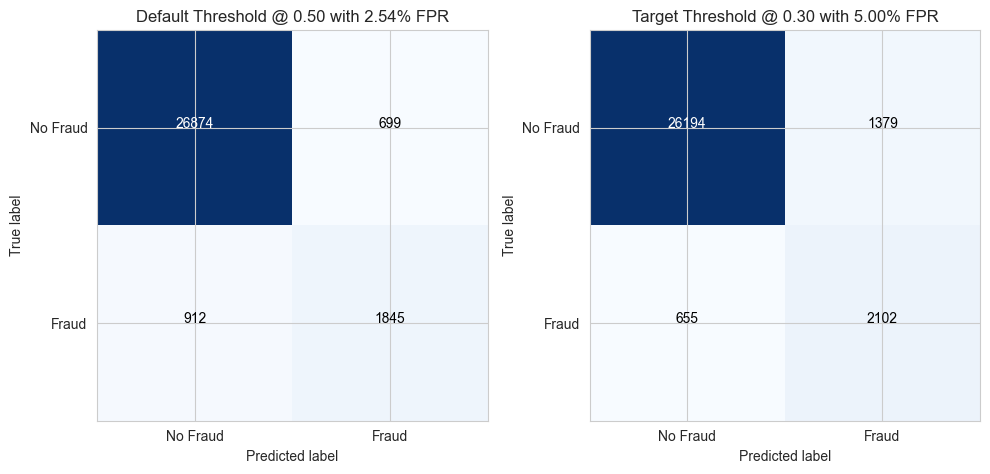

In [ ]:
# Testando o modelo de LightGBM usando os dados de teste e calculando as métricas
lgb_fpr, lgb_tpr, lgb_default_recall, lgb_target_recall = test_classifier(lgb_model, X_test, y_test)

## 8.5.1 - Resultados

Usando limite de classificação de 0.30:


    Verdadeiros Positivos (TP): O modelo RandomForest detectou com sucesso 2102/2757 possíveis intâncias

    Falsos Positivos (FP): Houveram 1379 que o modelo classificou incorretamente como Fraude

    Verdadeiros Negativos (TN): O modelo classificou corretamente 26194 instâncias negativas (não fraude) como verdadeiros Negativos

    Falsos Negativos (FN): Houveram 655 instâncias em que ele falhou em detectar um Verdadeiro Positivo (TP)

## 8.6 -  Curvas ROC e comparação AUC

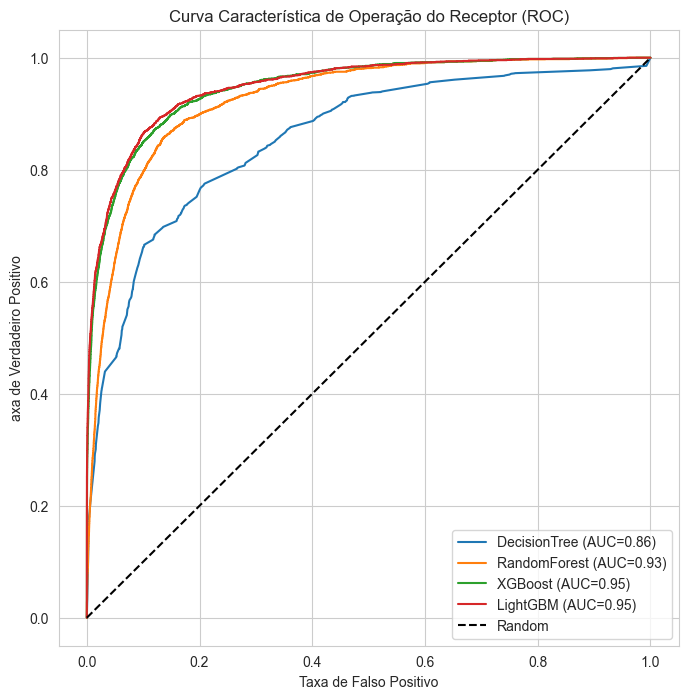

In [ ]:
# Criar listas das taxas dos valores positivos e negativos
fpr_list = [dt_fpr, rf_fpr, xgb_fpr, lgb_fpr]
tpr_list = [dt_tpr, rf_tpr, xgb_tpr, lgb_tpr]

# Criar lista das Labels para cada Classificador
label_list = ['DecisionTree', 'RandomForest', 'XGBoost', 'LightGBM']

# Plotar curvas ROC para cada classificador usando FPR(False Positive Rate), TPR (True Positive Rate) e labels
plot_roc_curves(fpr_list, tpr_list, label_list)




# 9 Escolha do Melhor Modelo para Solução do Problema de Negócio


Os modelos de ML foram melhorados com a escolha das melhores variáveis para correta classificação por parte dos modelos (status de empregabilidade do cliente/número residencial válido/idade do cliente/tipo de pagamento/número de telefone móvel válido). Esta escolha foi realizada através de métodos de Stratified K-Fold, RandomizedSearchCV e GridSearch CV.

Com estas melhorias, foram realizados treinamentos e testes dos modelos de Machine Learning com potencial de resolver o problema de negócio (Detecção efetiva de fraudes de aplicações bancárias).

Após realização das etapas mencionadas, concluímos que o modelo XGBoost é mais qualificado para solução da problemática, uma vez que apresenta uma taxa de precisão de 0.95, usando um tempo de processamento muito menor que o o modelo LightGBM, o qual levou mais de 2h. O modelo XGBoost além de ter a mesma taxa de precisão, permite uma implementação mais efetiva em produção ao gastar menos tempo para analisar os dados.